**Name:** VISHNU VARDHAN G V S <br>
**Email ID:** vishnugsvs@gmail.com

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA

In [3]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trader_df = pd.read_csv("/content/historical_data.csv")

In [4]:
sentiment_df['date'] = pd.to_datetime(
    sentiment_df['date'],
    errors='coerce'
).dt.date

trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)
trader_df['date'] = trader_df['Timestamp IST'].dt.date

In [5]:
data = trader_df.merge(
    sentiment_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           4659 non-null   object        
 1   Coin              4659 non-null   object        
 2   Execution Price   4659 non-null   float64       
 3   Size Tokens       4659 non-null   float64       
 4   Size USD          4659 non-null   float64       
 5   Side              4659 non-null   object        
 6   Timestamp IST     4659 non-null   datetime64[ns]
 7   Start Position    4659 non-null   float64       
 8   Direction         4659 non-null   object        
 9   Closed PnL        4659 non-null   float64       
 10  Transaction Hash  4659 non-null   object        
 11  Order ID          4659 non-null   int64         
 12  Crossed           4659 non-null   bool          
 13  Fee               4658 non-null   float64       
 14  Trade ID          4658 n

In [9]:
data.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,value
count,4659.000000,4659.000000,4.659000e+03,4659,4659.000000,4659.000000,4.659000e+03,4658.000000,4.658000e+03,4.658000e+03,4653.000000
mean,18928.100886,2111.505312,8.002460e+03,2025-02-24 22:17:27.868641536,19731.443702,140.497171,7.432249e+10,1.411494,5.587508e+14,1.738778e+12,46.751343
min,0.007412,0.000010,1.000000e-01,2024-09-20 14:06:00,-1000000.000000,-29370.119800,3.808060e+10,0.000000,0.000000e+00,1.730000e+12,10.000000
25%,12.487000,0.655840,2.000000e+02,2025-02-07 19:29:00,-65.805000,0.000000,7.045450e+10,0.016821,2.812500e+14,1.740000e+12,32.000000
50%,24.696000,29.410000,9.469700e+02,2025-03-04 07:51:00,5.868190,0.000000,7.677609e+10,0.098719,5.540000e+14,1.740000e+12,43.000000
75%,426.250000,189.425000,3.073520e+03,2025-04-10 20:53:00,11744.012440,11.813000,8.561083e+10,0.497639,8.450000e+14,1.740000e+12,61.000000
max,85522.000000,682429.000000,3.509753e+06,2025-04-25 13:39:00,600000.000000,27223.741500,8.878166e+10,247.554114,1.130000e+15,1.750000e+12,87.000000
std,34304.794573,17240.712583,6.502366e+04,NaN,102182.784425,1138.102381,1.275568e+10,7.798321,3.246060e+14,4.692598e+09,19.106803


In [10]:
obj_cols = data.select_dtypes(include='object').columns
data[obj_cols].isna().sum()

,0
Account,0
Coin,0
Side,0
Direction,0
Transaction Hash,0
date,0
classification,6


In [11]:
for col in obj_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-951618644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [12]:
data[obj_cols].isna().sum()

,0
Account,0
Coin,0
Side,0
Direction,0
Transaction Hash,0
date,0
classification,0


In [13]:
data.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [14]:
float_cols = data.select_dtypes(include='float64').columns
data[float_cols].isna().sum()

,0
Execution Price,0
Size Tokens,0
Size USD,0
Start Position,0
Closed PnL,0
Fee,1
Trade ID,1
Timestamp,1
value,6


In [15]:
for col in float_cols:
    data[col].fillna(data[col].median(), inplace=True)

/tmp/ipython-input-668948245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [16]:
data[float_cols].isna().sum()

,0
Execution Price,0
Size Tokens,0
Size USD,0
Start Position,0
Closed PnL,0
Fee,0
Trade ID,0
Timestamp,0
value,0


In [17]:
data.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [18]:
sentiment_map = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}

data['sentiment_score'] = data['classification'].map(sentiment_map)
data['win'] = data['Closed PnL'] > 0

In [19]:
pnl_by_sentiment = data.groupby('classification')['Closed PnL'].mean()
winrate_by_sentiment = data.groupby('classification')['win'].mean()
risk_by_sentiment = data.groupby('classification')['Size USD'].mean()

print("\nAverage PnL by Sentiment:\n", pnl_by_sentiment)
print("\nWin Rate by Sentiment:\n", winrate_by_sentiment)
print("\nAverage Position Size (USD) by Sentiment:\n", risk_by_sentiment)


Average PnL by Sentiment:
 classification
Extreme Fear     198.456185
Extreme Greed     33.592341
Fear             137.783467
Greed             90.039623
Neutral          218.285346
Name: Closed PnL, dtype: float64

Win Rate by Sentiment:
 classification
Extreme Fear     0.315301
Extreme Greed    0.165625
Fear             0.377327
Greed            0.206687
Neutral          0.606982
Name: win, dtype: float64

Average Position Size (USD) by Sentiment:
 classification
Extreme Fear      6539.688454
Extreme Greed     3061.835375
Fear             15091.543467
Greed             2198.430030
Neutral           2352.460552
Name: Size USD, dtype: float64


Neutral sentiment performs best: highest average PnL and highest win rate with relatively low position size which indicates strong risk-adjusted performance.<p>

Fear and Extreme Fear regimes are profitable but have moderate win rates and involve larger risk exposure, especially Fear.<p>

Fear shows the highest position sizes suggesting aggressive risk-taking, but this does not translate to the best returns.<p>

Greed and Extreme Greed perform worst: lowest PnL and lowest win rates, indicating poor trade quality during euphoric markets.<p>

Higher risk does not guarantee higher returns; disciplined trading in neutral conditions outperforms aggressive sentiment-driven strategies.<p>

**Takeaway**: Rational or Neutral market conditions yield the most consistent and efficient trading outcomes, while greed-driven markets degrade performance.

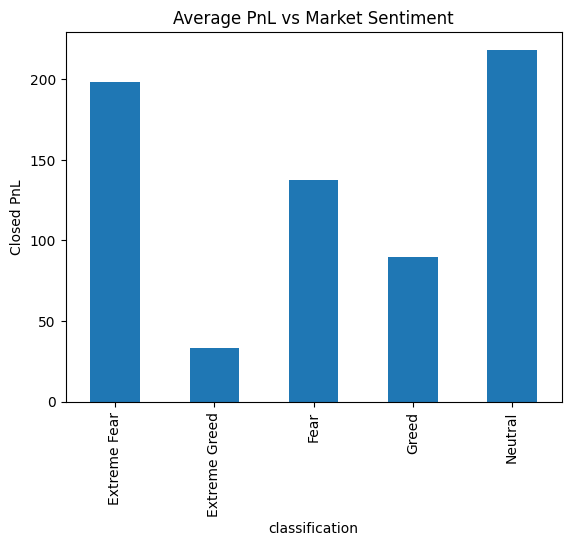

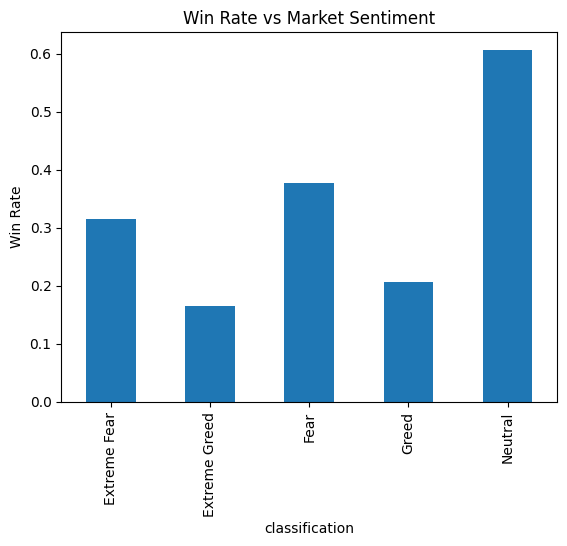

In [20]:
plt.figure()
pnl_by_sentiment.plot(kind='bar')
plt.title("Average PnL vs Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

plt.figure()
winrate_by_sentiment.plot(kind='bar')
plt.title("Win Rate vs Market Sentiment")
plt.ylabel("Win Rate")
plt.show()

In [21]:
trader_stats = data.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': 'mean',
    'sentiment_score': 'mean'
}).reset_index()

trader_stats.columns = [
    'Account',
    'Total_PnL',
    'Avg_PnL',
    'Avg_Size_USD',
    'Avg_Sentiment'
]

In [22]:
scaler = StandardScaler()
X_cluster = scaler.fit_transform(
    trader_stats[['Total_PnL', 'Avg_Size_USD']]
)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_stats['Cluster'] = kmeans.fit_predict(X_cluster)

print("\nTrader Cluster Summary:\n")
print(
    trader_stats
    .groupby('Cluster')[['Total_PnL','Avg_Size_USD']]
    .mean()
)


Trader Cluster Summary:

             Total_PnL  Avg_Size_USD
Cluster                             
0        403011.504159   2133.667364
1         67845.619531   2979.441776
2        183719.197083  12211.137779


In [26]:
model_data = data[['sentiment_score','Size USD','Closed PnL']].dropna()

X = model_data[['sentiment_score','Size USD']]
y = (model_data['Closed PnL'] > 0).astype(int)

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

print("\nFeature Importance (Predicting Profitable Trades):")
for f, i in zip(X.columns, model.feature_importances_):
    print(f"{f}: {round(i, 3)}")


Feature Importance (Predicting Profitable Trades):
sentiment_score: 0.097
Size USD: 0.903


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

features = [
    'Execution Price',
    'Size USD',
    'Start Position',
    'sentiment_score'
]

X = data[features]
y = data['win']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Performance Metrics:\n")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Random Forest Performance Metrics:

Accuracy  : 0.9914
Precision : 0.9910
Recall    : 0.9851
F1 Score  : 0.9880

Classification Report:

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       597
        True       0.99      0.99      0.99       335

    accuracy                           0.99       932
   macro avg       0.99      0.99      0.99       932
weighted avg       0.99      0.99      0.99       932

Confusion Matrix:

[[594   3]
 [  5 330]]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

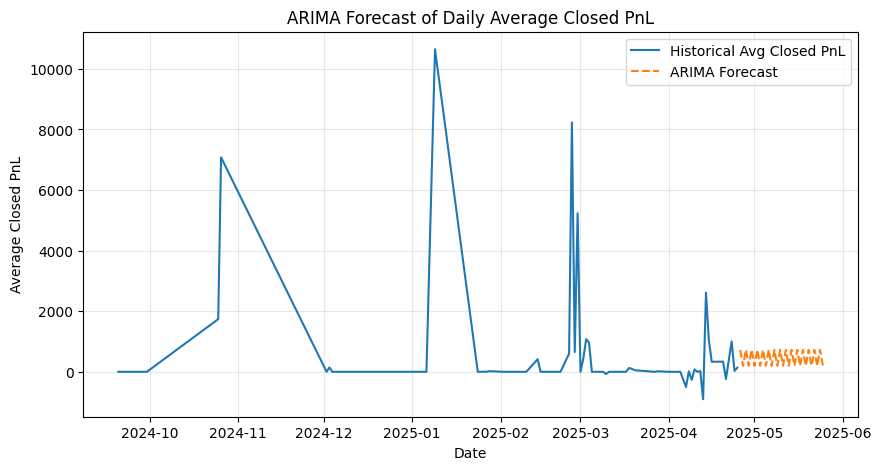

In [31]:
daily_pnl = (
    data
    .set_index('Timestamp IST')
    .resample('D')['Closed PnL']
    .mean()
    .dropna()
)

# Fit ARIMA model
arima_model = ARIMA(daily_pnl, order=(2, 1, 2))
arima_fit = arima_model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = arima_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(
    start=daily_pnl.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_pnl.index, daily_pnl, label='Historical Avg Closed PnL')
plt.plot(forecast_index, forecast, linestyle='--', label='ARIMA Forecast')
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.title("ARIMA Forecast of Daily Average Closed PnL")
plt.legend()
plt.grid(alpha=0.3)
plt.show()